In [3]:
import mysql.connector
import pandas as pd
con=mysql.connector.connect(
    host='localhost',
    port=3306,
    username='root',
    password='Aspire@2020',
    database='hh')
df=pd.read_sql_query('Select * from studentmarks',con)
df.head(5)

,Name,Gender,DOB,Maths,Physics,Chemistry,English,Biology,Economics,History,Civics
0,John,M,1988-04-05,55,45,56,87,21,52,89,65
1,Suresh,M,1987-05-04,75,96,78,64,90,61,58,2
2,Ramesh,M,1989-05-25,25,54,89,76,95,87,56,74
3,Jessica,F,1990-08-12,78,96,86,63,54,89,75,45
4,Jennifer,F,1989-09-02,58,96,78,46,96,77,83,53


In [6]:
import seaborn as sbn
import matplotlib.pyplot as plt


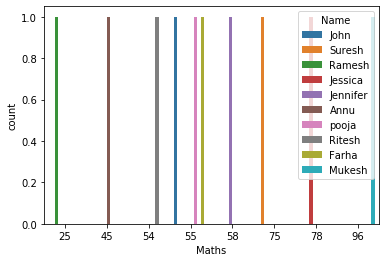

In [7]:
sbn.countplot('Maths',hue='Name',data=df)

In [8]:
df['Name'].unique()

array(['John', 'Suresh', 'Ramesh', 'Jessica', 'Jennifer', 'Annu', 'pooja',
       'Ritesh', 'Farha', 'Mukesh'], dtype=object)

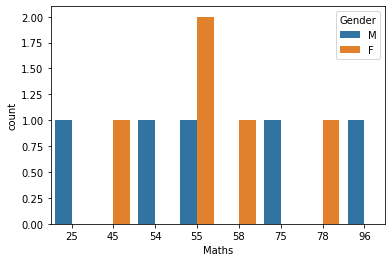

In [9]:
sbn.countplot('Maths',hue='Gender',data=df)

In [10]:
df['Maths'].min()

25

In [11]:
df['Maths'].max()

96

In [18]:
import numpy as np
df['Maths'].nlargest(5)

9    96
3    78
1    75
4    58
0    55
Name: Maths, dtype: int64

In [25]:
df.groupby('Physics')['Name'].apply(lambda x: x.all())

Physics
45        John
46      Mukesh
54      Ramesh
63       Farha
64       pooja
76      Ritesh
87        Annu
96    Jennifer
Name: Name, dtype: object

In [22]:
df['Physics'].unique()

array([45, 96, 54, 87, 64, 76, 63, 46], dtype=int64)

In [26]:
df['English'].max()

89

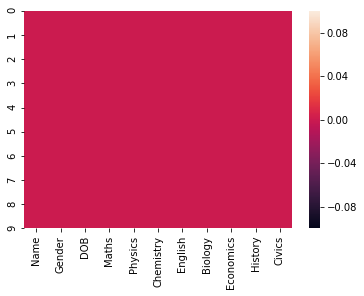

In [27]:
sbn.heatmap(df.isnull())

In [28]:
df.columns

Index(['Name', 'Gender', 'DOB', 'Maths', 'Physics', 'Chemistry', 'English',
       'Biology', 'Economics', 'History', 'Civics'],
      dtype='object')

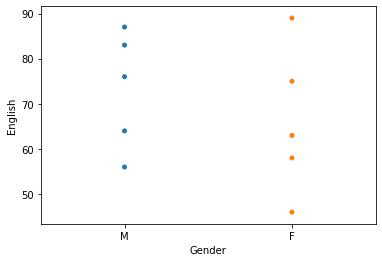

In [30]:
sbn.swarmplot('Gender','English',data=df)

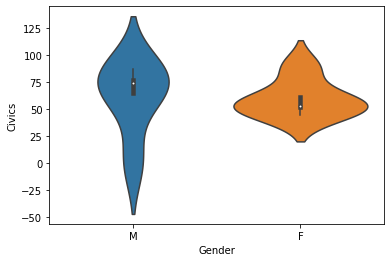

In [31]:
sbn.violinplot('Gender','Civics',data=df)

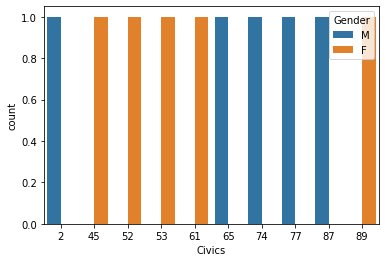

In [32]:
sbn.countplot('Civics',hue='Gender',data=df)

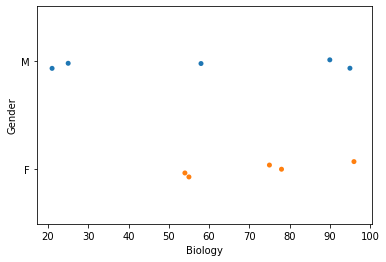

In [34]:
sbn.stripplot('Biology','Gender',data=df)

This plot shows distribution of marks among people in biology

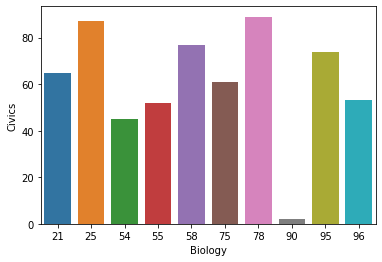

In [38]:
sbn.barplot('Biology','Civics',data=df)

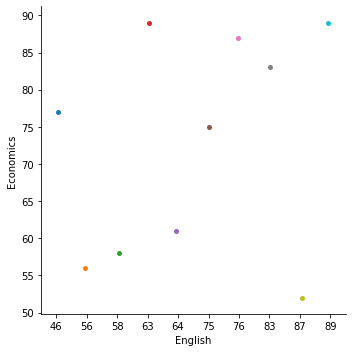

In [43]:
sbn.catplot('English','Economics',data=df)

In [44]:
df.groupby('English')['Gender'].value_counts()

English  Gender
46       F         1
56       M         1
58       F         1
63       F         1
64       M         1
75       F         1
76       M         1
83       M         1
87       M         1
89       F         1
Name: Gender, dtype: int64

In [45]:
df.groupby('Gender')['Civics'].value_counts()

Gender  Civics
F       45        1
        52        1
        53        1
        61        1
        89        1
M       2         1
        65        1
        74        1
        77        1
        87        1
Name: Civics, dtype: int64

In [46]:
df.tail()

,Name,Gender,DOB,Maths,Physics,Chemistry,English,Biology,Economics,History,Civics
5,Annu,F,1988-04-05,45,87,52,89,55,89,87,52
6,pooja,F,1987-05-04,55,64,61,58,75,58,64,61
7,Ritesh,M,1989-05-25,54,76,87,56,25,56,76,87
8,Farha,F,1990-08-12,55,63,89,75,78,75,63,89
9,Mukesh,M,1989-09-02,96,46,77,83,58,83,46,77


In [59]:
df.nlargest(3,['Biology'])

,Name,Gender,DOB,Maths,Physics,Chemistry,English,Biology,Economics,History,Civics
4,Jennifer,F,1989-09-02,58,96,78,46,96,77,83,53
2,Ramesh,M,1989-05-25,25,54,89,76,95,87,56,74
1,Suresh,M,1987-05-04,75,96,78,64,90,61,58,2


In [71]:
df


,Name,Gender,DOB,Maths,Physics,Chemistry,English,Biology,Economics,History,Civics
0,John,M,1988-04-05,55,45,56,87,21,52,89,65
1,Suresh,M,1987-05-04,75,96,78,64,90,61,58,2
2,Ramesh,M,1989-05-25,25,54,89,76,95,87,56,74
3,Jessica,F,1990-08-12,78,96,86,63,54,89,75,45
4,Jennifer,F,1989-09-02,58,96,78,46,96,77,83,53
5,Annu,F,1988-04-05,45,87,52,89,55,89,87,52
6,pooja,F,1987-05-04,55,64,61,58,75,58,64,61
7,Ritesh,M,1989-05-25,54,76,87,56,25,56,76,87
8,Farha,F,1990-08-12,55,63,89,75,78,75,63,89
9,Mukesh,M,1989-09-02,96,46,77,83,58,83,46,77


In [74]:
df.groupby('Gender')['Physics'].apply(lambda x: x.mean())

Gender
F    81.2
M    63.4
Name: Physics, dtype: float64

In [75]:
df.groupby('Gender')['Maths'].apply(lambda x: x.mean())

Gender
F    58.2
M    61.0
Name: Maths, dtype: float64

In [79]:
emean=df.groupby('Gender')['English'].apply(lambda x: x.mean())

In [78]:
bmean=df.groupby('Gender')['Biology'].apply(lambda x: x.mean())

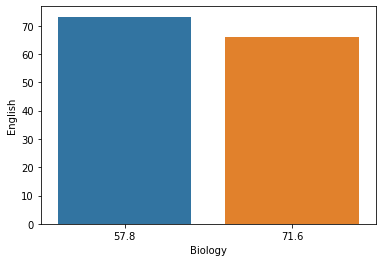

In [80]:
sbn.barplot(bmean,emean)

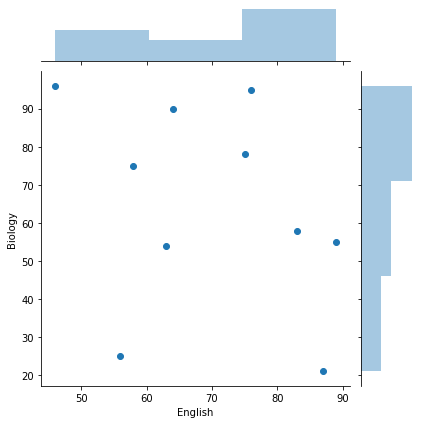

In [92]:
sbn.jointplot('English','Biology',data=df)

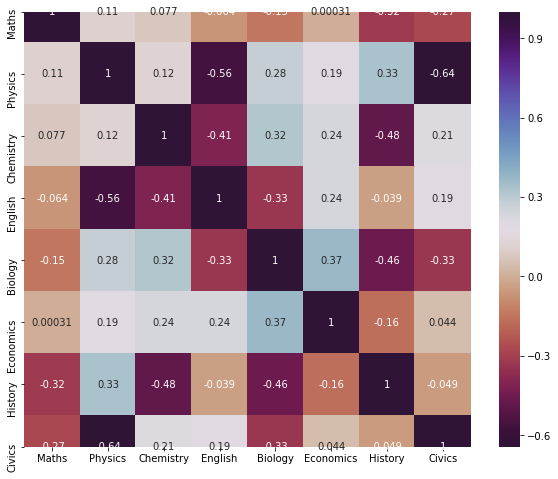

In [96]:

plt.figure(figsize=(10,8))
sbn.heatmap(df.corr(),annot=True,cmap='twilight_shifted_r')

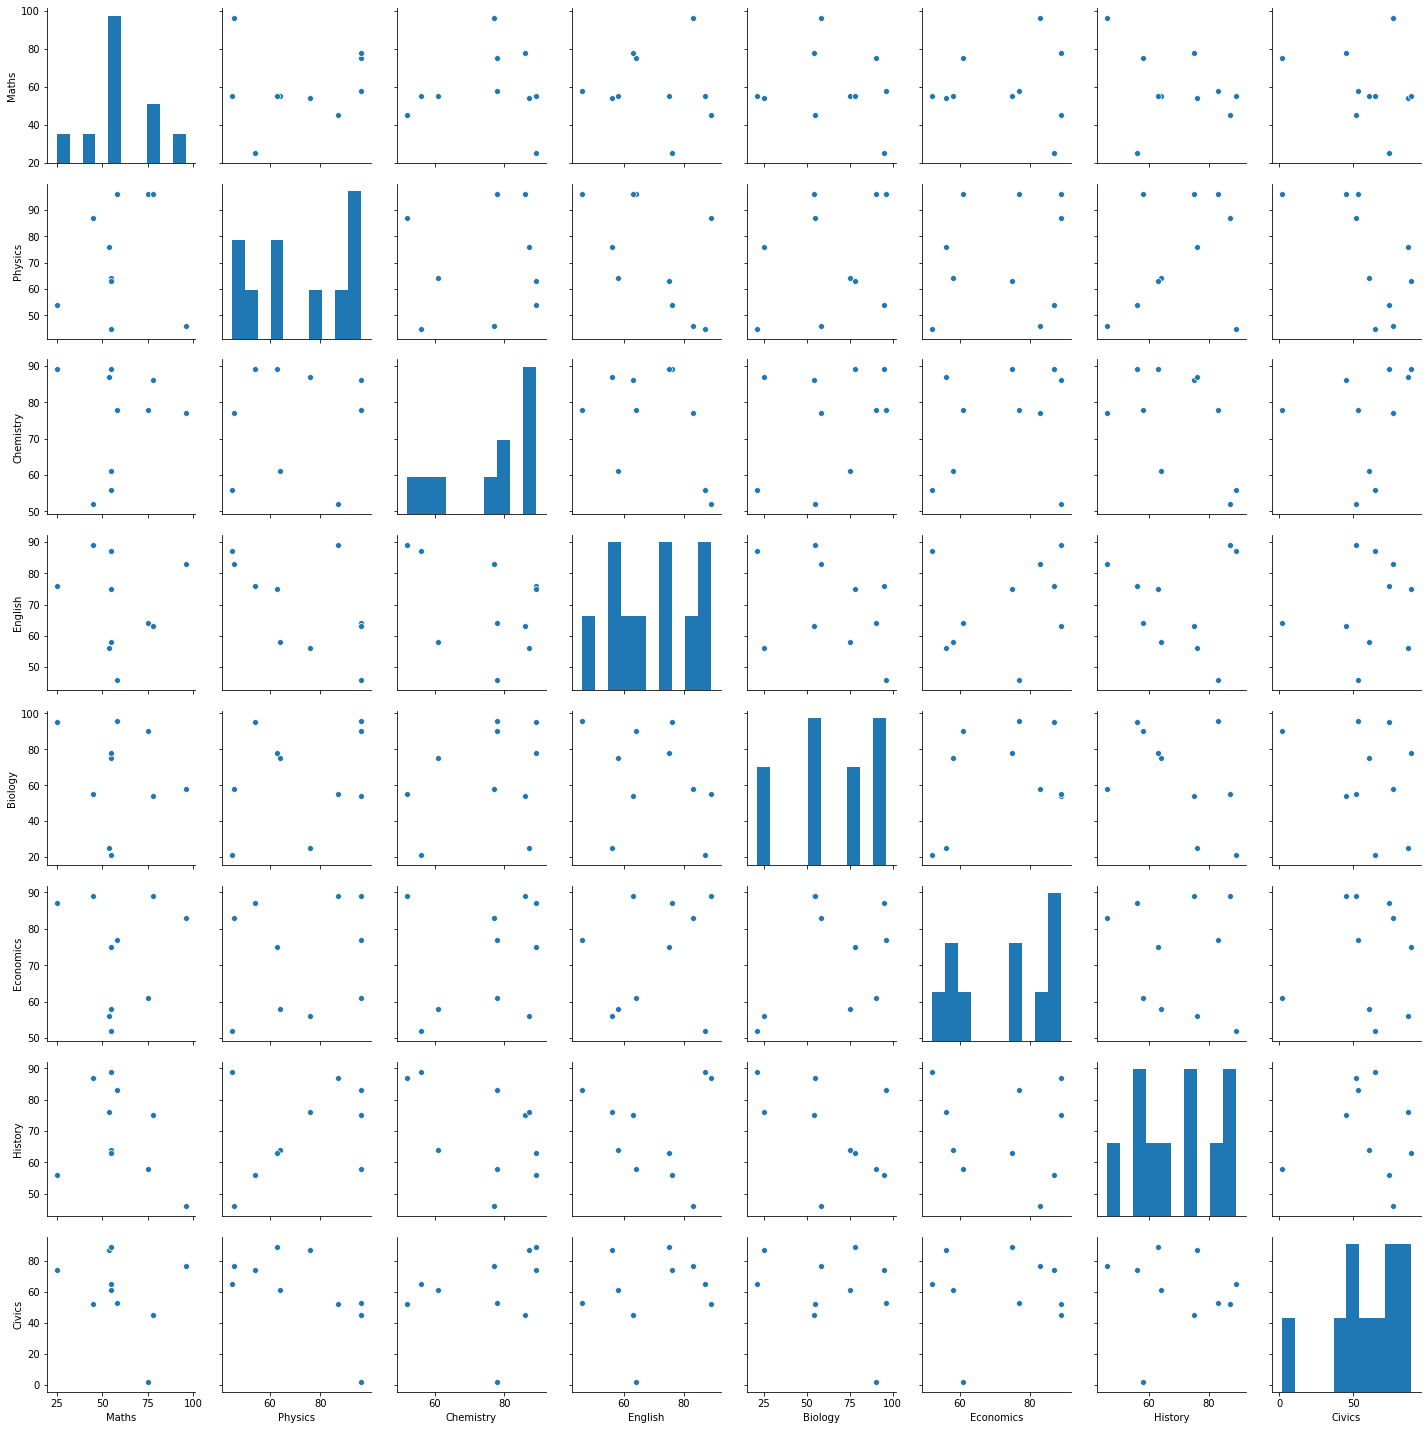

In [97]:
sbn.pairplot(df)